### Ejercicio 1

In [3]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import math

sys.path.append('C:/Users/Portables/Desktop/Materias/Circu/Circulacion-General-FCEN/modulo_oceano')

from funciones.cargar_salida_QG import *
from funciones.calculosCBO import *
from funciones.laplaciano import *


In [4]:
# Directorios de salida para cada modelo
base_dir = 'C:/Users/Portables/Desktop/Materias/Circu/Practica 1'

dir_salidas = {
    "S1": f"{base_dir}/out_tmp_S1/",
    "S2": f"{base_dir}/out_tmp_S2/",
    "M1": f"{base_dir}/out_tmp_M1/",
    "M2": f"{base_dir}/out_tmp_M2/"
}

# Dimensiones del modelo
Lx, Ly = 4000, 2000  # Dimensiones de la cuenca en km
nx, ny = 200, 100    # Puntos de grilla

In [5]:
# Usa los directorios para cargar los datos
S1 = cargar(dir_salidas["S1"], 4000, 2000, 200, 100)
S2 = cargar(dir_salidas["S2"], 4000, 2000, 200, 100)
M1 = cargar(dir_salidas["M1"], 4000, 2000, 200, 100)
M2 = cargar(dir_salidas["M2"], 4000, 2000, 200, 100)

In [6]:
print(cargar(dir_salidas["S1"], 4000, 2000, 200, 100)[5])
print(cargar(dir_salidas["M1"], 4000, 2000, 200, 100)[5])

[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.031 0.031 0.031 ... 0.031 0.031 0.031]
 [0.062 0.062 0.062 ... 0.062 0.062 0.062]
 ...
 [0.062 0.062 0.062 ... 0.062 0.062 0.062]
 [0.031 0.031 0.031 ... 0.031 0.031 0.031]
 [0.    0.    0.    ... 0.    0.    0.   ]]
[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.031 0.031 0.031 ... 0.031 0.031 0.031]
 [0.062 0.062 0.062 ... 0.062 0.062 0.062]
 ...
 [0.062 0.062 0.062 ... 0.062 0.062 0.062]
 [0.031 0.031 0.031 ... 0.031 0.031 0.031]
 [0.    0.    0.    ... 0.    0.    0.   ]]


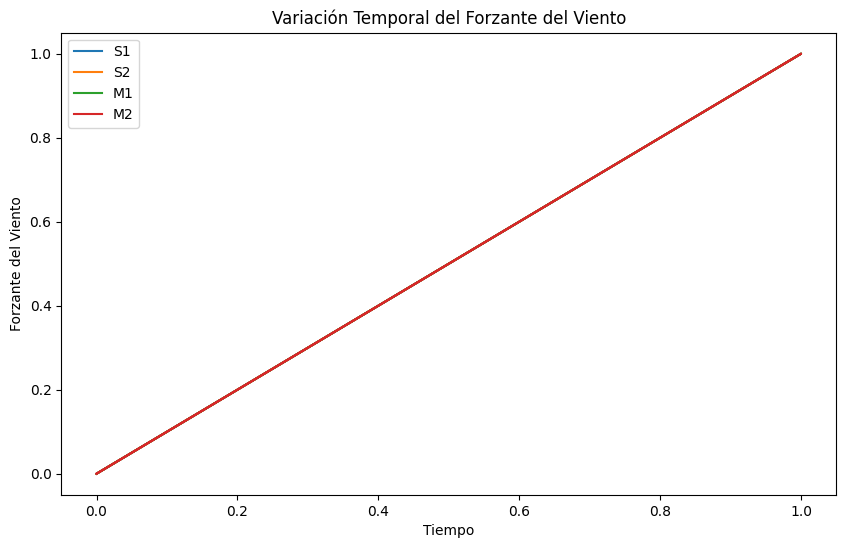

In [7]:
def cargar_wind_stress(file_path):
    # Cargar los datos del archivo QG_wind_stress.dat
    data = np.loadtxt(file_path)
    return data

# Ruta al archivo de forzante del viento
wind_stress_files = {
    "S1": f"{dir_salidas['S1']}/QG_wind_stress.dat",
    "S2": f"{dir_salidas['S2']}/QG_wind_stress.dat",
    "M1": f"{dir_salidas['M1']}/QG_wind_stress.dat",
    "M2": f"{dir_salidas['M2']}/QG_wind_stress.dat"
}

# Cargar los datos de cada simulación
wind_stress_S1 = cargar_wind_stress(wind_stress_files["S1"])
wind_stress_S2 = cargar_wind_stress(wind_stress_files["S2"])
wind_stress_M1 = cargar_wind_stress(wind_stress_files["M1"])
wind_stress_M2 = cargar_wind_stress(wind_stress_files["M2"])

# Gráfico básico para observar la variación temporal
plt.figure(figsize=(10, 6))
plt.plot(wind_stress_S1[:, 0], wind_stress_S1[:, 1], label='S1')
plt.plot(wind_stress_S2[:, 0], wind_stress_S2[:, 1], label='S2')
plt.plot(wind_stress_M1[:, 0], wind_stress_M1[:, 1], label='M1')
plt.plot(wind_stress_M2[:, 0], wind_stress_M2[:, 1], label='M2')
plt.xlabel('Tiempo')
plt.ylabel('Forzante del Viento')
plt.title('Variación Temporal del Forzante del Viento')
plt.legend()
plt.show()

In [5]:
def analizar_spin_up(datos, titulo):
    # Datos[4] corresponde a QG_diag según la estructura de salida de la función cargar
    energias = datos[4][:, 3]  # Asumiendo que la energía cinética está en la cuarta columna
    plt.figure(figsize=(10, 6))
    plt.plot(energias, label='Energía Cinética')
    plt.title(titulo)
    plt.xlabel('Tiempo')
    plt.ylabel('Energía Cinética')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Establecer un criterio para determinar la estabilización
    umbral = 0.01  # 1% de cambio
    iteraciones_estables = 0
    for i in range(1, len(energias)):
        if abs((energias[i] - energias[i-1]) / energias[i-1]) < umbral:
            iteraciones_estables += 1
        else:
            iteraciones_estables = 0  # Reiniciar si el cambio es mayor que el umbral
        if iteraciones_estables >= 10:  # Número consecutivo de iteraciones estables
            print(f"El modelo {titulo} se estabilizó después de {i} iteraciones.")
            break


In [6]:
def calcular_estabilizacion(datos, titulo):
    # Datos[4] corresponde a QG_diag según la estructura de salida de la función cargar
    energias = datos[4][:, 3]  # Asumiendo que la energía cinética está en la cuarta columna

    # Establecer un criterio para determinar la estabilización
    umbral = 0.01  # 1% de cambio
    iteraciones_estables = 0

    for i in range(1, len(energias)):
        if abs((energias[i] - energias[i-1]) / energias[i-1]) < umbral:
            iteraciones_estables += 1
        else:
            iteraciones_estables = 0  # Reiniciar si el cambio es mayor que el umbral

        if iteraciones_estables >= 10:  # Número consecutivo de iteraciones estables
            print(f"El modelo {titulo} se estabilizó después de {i} iteraciones.")
            return i  # Retornar la cantidad de iteraciones en las que se estabilizó

    print(f"El modelo {titulo} no se estabilizó en las iteraciones disponibles.")
    return None  # Si no se estabiliza, retornar None

In [7]:
# Aplicar la función calcular_estabilizacion a cada conjunto de datos
iteraciones_S1 = calcular_estabilizacion(S1, "Modelo S1")
iteraciones_S2 = calcular_estabilizacion(S2, "Modelo S2")
iteraciones_M1 = calcular_estabilizacion(M1, "Modelo M1")
iteraciones_M2 = calcular_estabilizacion(M2, "Modelo M2")

# Mostrar resultados
print(f"Iteraciones de estabilización para S1: {iteraciones_S1}")
print(f"Iteraciones de estabilización para S2: {iteraciones_S2}")
print(f"Iteraciones de estabilización para M1: {iteraciones_M1}")
print(f"Iteraciones de estabilización para M2: {iteraciones_M2}")

El modelo Modelo S1 se estabilizó después de 92 iteraciones.
El modelo Modelo S2 se estabilizó después de 60 iteraciones.
El modelo Modelo M1 se estabilizó después de 99 iteraciones.
El modelo Modelo M2 se estabilizó después de 117 iteraciones.
Iteraciones de estabilización para S1: 92
Iteraciones de estabilización para S2: 60
Iteraciones de estabilización para M1: 99
Iteraciones de estabilización para M2: 117


In [8]:
import matplotlib.pyplot as plt

def graficar_todas_energias(datos, titulos):
    plt.figure(figsize=(12, 8))
    for i, (data, title) in enumerate(zip(datos, titulos)):
        energias = data[4][:, 3]  # Asumimos que la columna 3 tiene la energía cinética
        plt.plot(energias, label=f'{title}')
    
    plt.title('Evolución de la Energía Cinética en los Modelos')
    plt.xlabel('Iteración')
    plt.ylabel('Energía Cinética')
    plt.legend()
    plt.grid(True)
    plt.show()

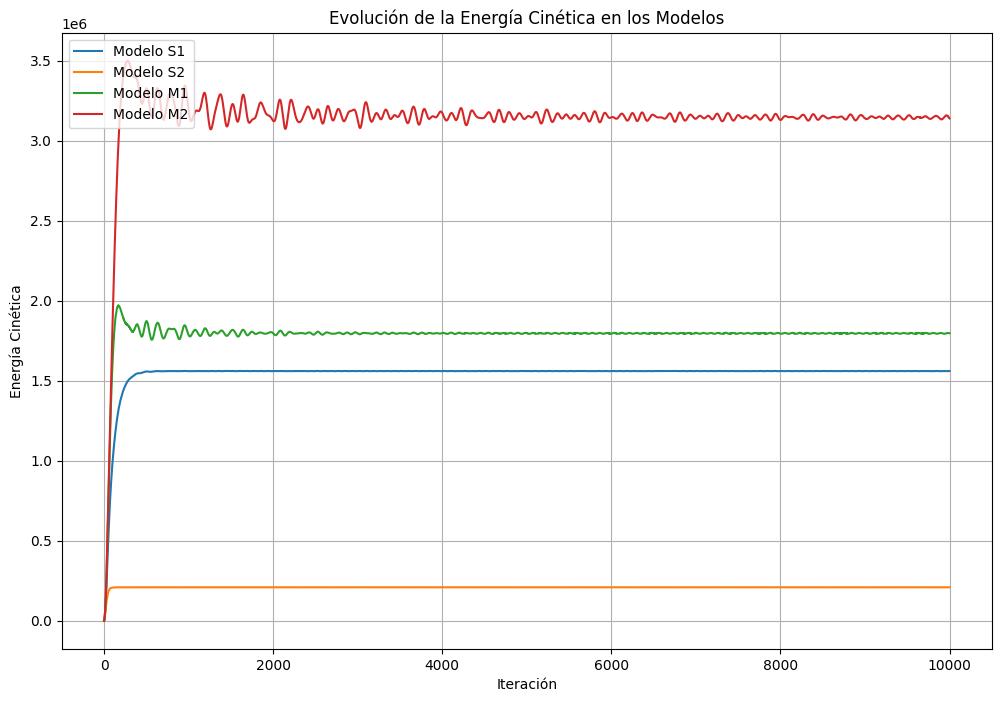

In [9]:
# Recopilar datos de cada modelo
datos_modelos = []
titulos = []

for nombre, dir_salida in dir_salidas.items():
    datos = cargar(dir_salida, Lx, Ly, nx, ny)
    datos_modelos.append(datos)
    titulos.append(f"Modelo {nombre}")

# Graficar la evolución de la energía cinética para todos los modelos
graficar_todas_energias(datos_modelos, titulos)

### Ejercicio 2

In [10]:
# Adaptación a las variables basadas en tu orden de retorno
psi_S1 = S1[2]  # psiF en tu función (tercer elemento)
psi_S2 = S2[2]  # psiF en tu función (tercer elemento)
psi_M1 = M1[2]  # psiF en tu función (tercer elemento)
psi_M2 = M2[2]  # psiF en tu función (tercer elemento)

vort_S1 = S1[3]  # vortF en tu función (cuarto elemento)
vort_S2 = S2[3]  # vortF en tu función (cuarto elemento)
vort_M1 = M1[3]  # vortF en tu función (cuarto elemento)
vort_M2 = M2[3]  # vortF en tu función (cuarto elemento)

# Escalas típicas
tau = 0.25          # Tensión del viento [N/m^2]
L = 4000000         # Longitud de la cuenca [m]
D = 2500            # Profundidad [m]
beta = 2e-11        # Coeficiente de Coriolis [1/(s*m)]
rho = 1025          # Densidad [kg/m^3]
K = 1.16e-7
Ef = K / (beta * L)

# Parámetros para la dimensionalización
U = (2 * math.pi * tau) / (rho * D * beta * L)  # Velocidad
Ro = (2 * math.pi * tau) / (rho * D * (math.pow(beta, 2) * math.pow(L, 3)))  # Número de Rossby

# Energía cinética
tke_S1 = S1[4][:, 3]  # La tercera columna tiene la Energía cinética total
tke_S2 = S2[4][:, 3]
tke_M1 = M1[4][:, 3]
tke_M2 = S2[4][:, 3]

# Dimensionalización de las variables
psi_S1_dim = psi_S1 * U * L
psi_S2_dim = psi_S2 * U * L
psi_M1_dim = psi_M1 * U * L
psi_M2_dim = psi_M2 * U * L

vort_S1_dim = vort_S1 * U / L
vort_S2_dim = vort_S2 * U / L
vort_M1_dim = vort_M1 * U / L
vort_M2_dim = vort_M2 * U / L

C:\Users\Portables\AppData\Local\Temp\ipykernel_11968\1987287378.py:107: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  plt.tight_layout()
C:\Users\Portables\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


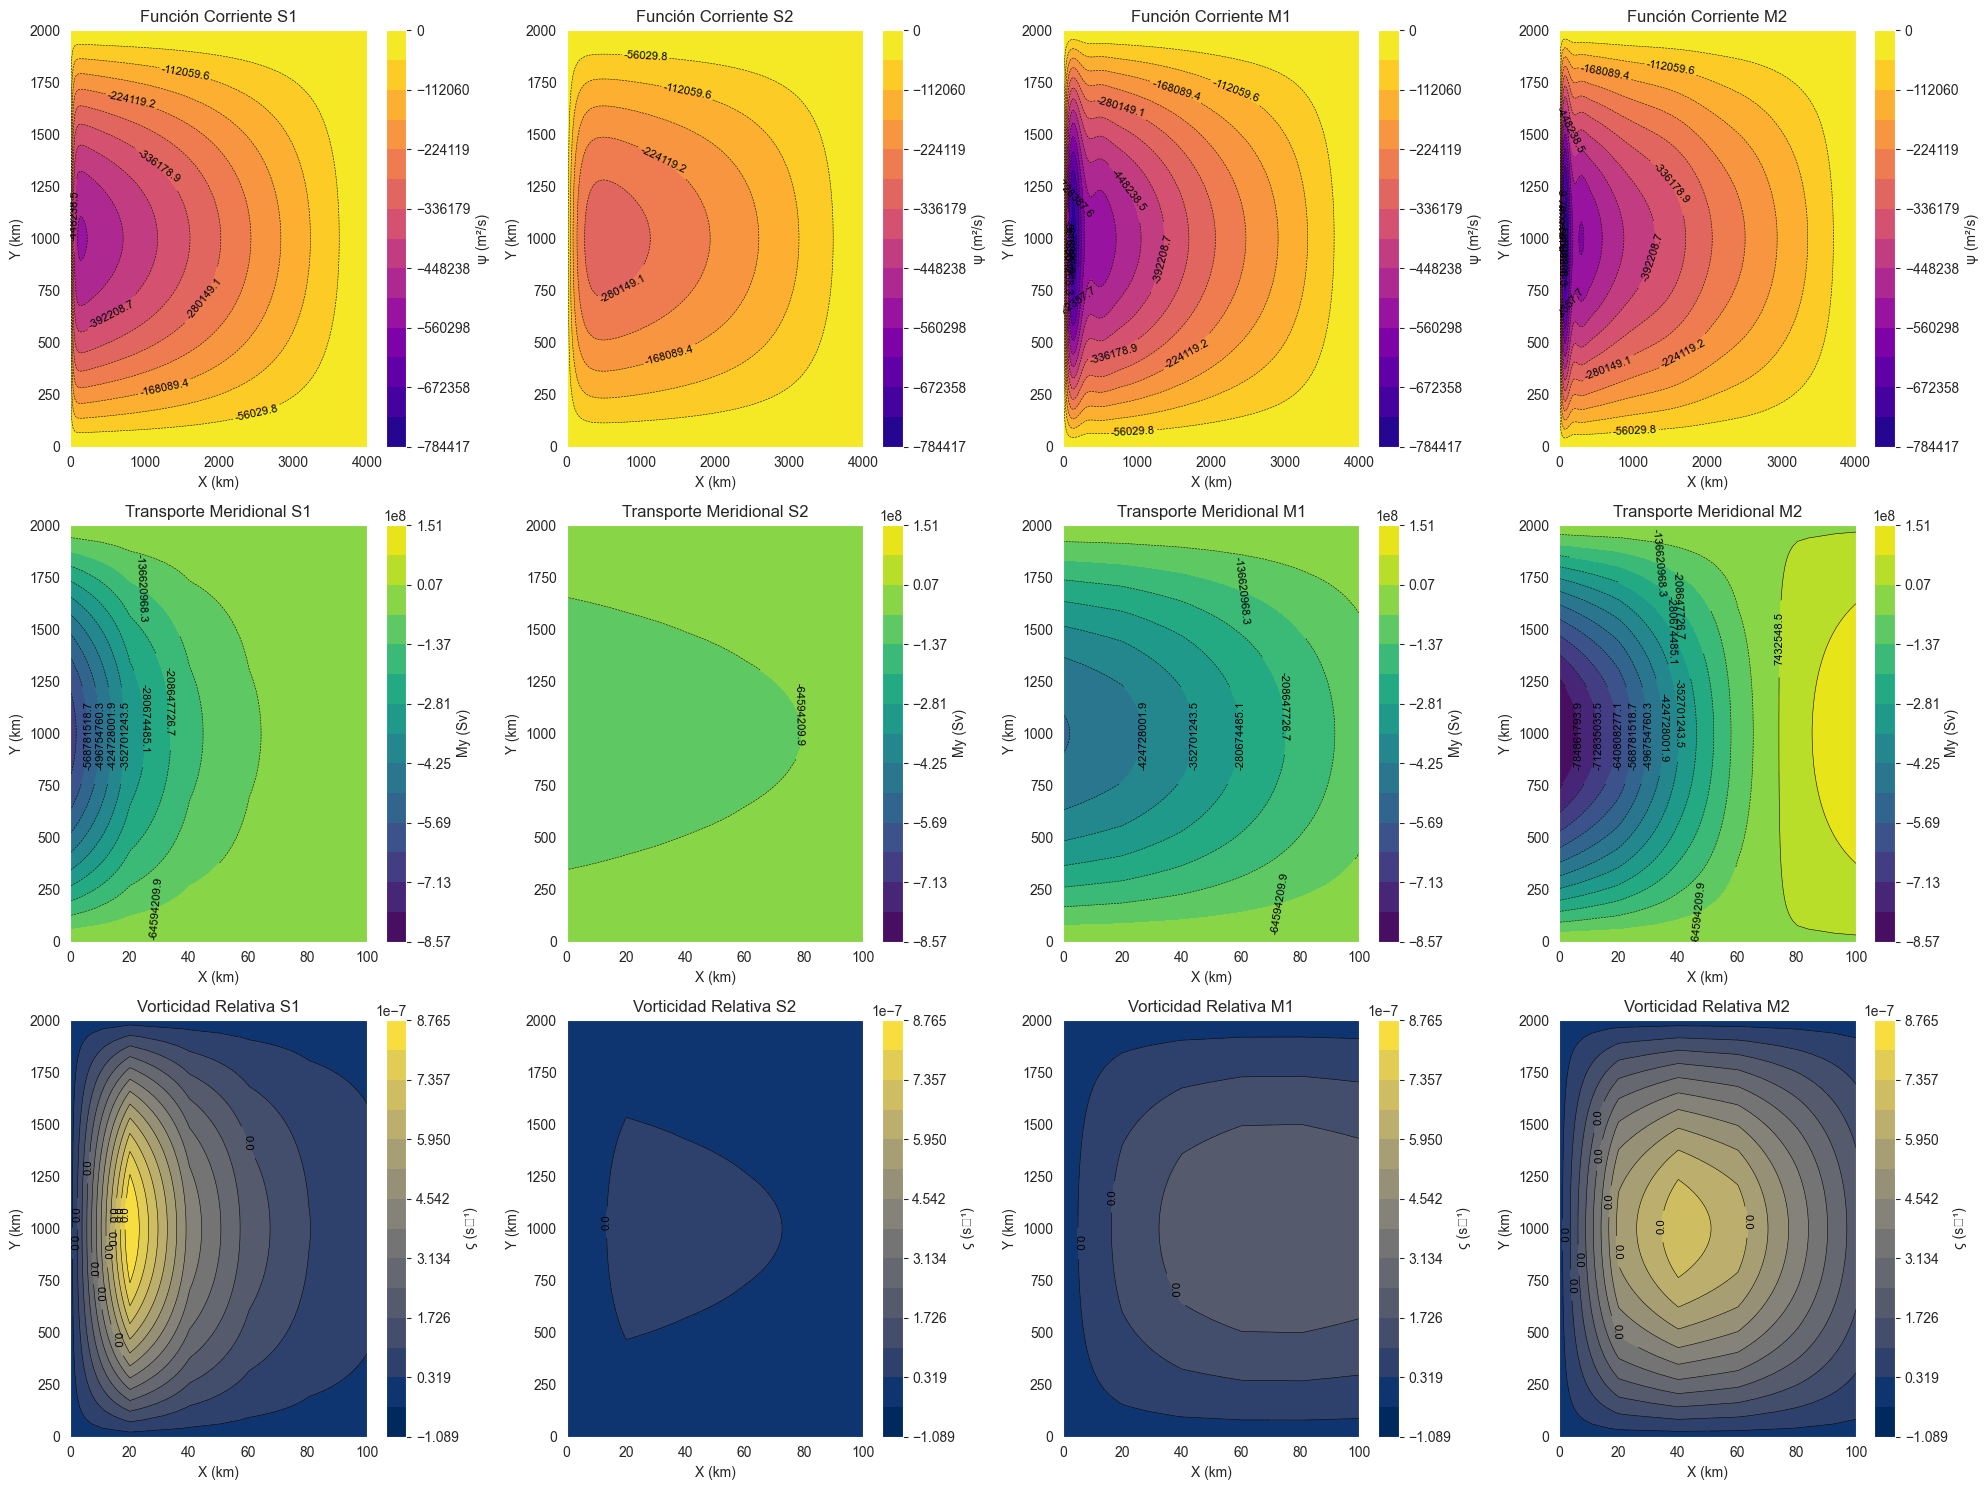

In [31]:
def calcular_transporte_meridional_promedio(psi, D):
    """
    Calcula el transporte meridional promediado en la vertical.
    psi: matriz de función corriente
    D: profundidad en metros
    """
    # Derivada zonal de la función corriente multiplicada por la profundidad
    trans_mer = np.diff(psi, n=1, axis=1) *D
    return trans_mer

def plot_campos(X, Y, campo, titulo, xlabel, ylabel, cbar_label, ax=None, vmin=None, vmax=None, colormap='viridis', levels=10, fmt="%.1f"):
    """
    Función genérica para graficar campos 2D con etiquetas.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    # Si levels es un entero, generar los niveles automáticamente
    if isinstance(levels, int):
        level_values = np.linspace(vmin if vmin is not None else np.min(campo), 
                                   vmax if vmax is not None else np.max(campo), levels)
    else:
        level_values = levels
    
    # Graficar con los límites de color especificados y niveles personalizados
    contourf = ax.contourf(X, Y, campo, levels=level_values, cmap=colormap)
    
    # Añadir líneas de contorno sobre el gráfico contourf
    cont = ax.contour(X, Y, campo, levels=level_values, colors='k', linewidths=0.4)
    
    # Aplicar el formato directamente al crear las etiquetas
    ax.clabel(cont, inline=True, fontsize=8, fmt=fmt)
    
    cbar = plt.colorbar(contourf, ax=ax)
    cbar.set_label(cbar_label)
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if ax is None:  # Solo mostrar si se crea una nueva figura
        plt.show()

# Crear una figura y ajustar el número de subplots
num_plots = len(dir_salidas)
fig, axs = plt.subplots(3, num_plots, figsize=(20, 15))  # 3 filas por número de elementos en dir_salidas

# Primera pasada para calcular los límites de color
psidim_min, psidim_max = float('inf'), float('-inf')
trans_mer_dim_min, trans_mer_dim_max = float('inf'), float('-inf')
vortdim_min, vortdim_max = float('inf'), float('-inf')

for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    
    # Dimensionalización de las variables
    psi_dim = psiF * U * L
    vort_dim = vortF * U / L
    trans_mer_dim = calcular_transporte_meridional_promedio(psi_dim, D)

    # Actualizar los límites de color para cada campo
    psidim_min, psidim_max = min(psidim_min, psi_dim.min()), max(psidim_max, psi_dim.max())
    trans_mer_dim_min, trans_mer_dim_max = min(trans_mer_dim_min, trans_mer_dim.min()), max(trans_mer_dim_max, trans_mer_dim.max())
    vortdim_min, vortdim_max = min(vortdim_min, vort_dim.min()), max(vortdim_max, vort_dim.max())

# Segunda pasada para graficar
x_lim_zoom = 100  # Limite especial para el eje X en los primeros 100 km

for idx, (nombre, dir_salida) in enumerate(dir_salidas.items()):
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Dimensionalización de las variables
    psi_dim = psiF * U * L
    vort_dim = vortF * U / L
    trans_mer_dim = calcular_transporte_meridional_promedio(psi_dim, D)

    # Recortar X, Y y el campo para asegurarse de que tienen las mismas dimensiones
    X = X[:psiF.shape[1]]  # Ajustar X al tamaño del campo en la dirección X
    Y = Y[:psiF.shape[0]]  # Ajustar Y al tamaño del campo en la dirección Y

    if psi_dim.ndim == 2 and vort_dim.ndim == 2 and trans_mer_dim.ndim == 2:
        psi_dim = psi_dim[:len(Y), :len(X)]  # Recortar psi_dim para que coincida con X y Y
        trans_mer_dim = trans_mer_dim[:len(Y), :len(X)-1]  # Recortar trans_mer_dim adecuadamente
        vort_dim = vort_dim[:len(Y), :len(X)]  # Recortar vort_dim para que coincida con X y Y

        # Graficar la función corriente (sin límite en X)
        ax = axs[0, idx]
        plot_campos(X, Y, psi_dim, f'Función Corriente {nombre}', 'X (km)', 'Y (km)', 'ψ (m²/s)', ax=ax, vmin=psidim_min, vmax=psidim_max, colormap='plasma', levels=15, fmt="%.1f")

        # Graficar el transporte meridional (con límite en X)
        ax = axs[1, idx]
        plot_campos(X[:-1], Y, trans_mer_dim, f'Transporte Meridional {nombre}', 'X (km)', 'Y (km)', 'My (Sv)', ax=ax, vmin=trans_mer_dim_min, vmax=trans_mer_dim_max, colormap='viridis', levels=15, fmt="%.1f")
        ax.set_xlim([0, x_lim_zoom])

        # Graficar la vorticidad relativa (con límite en X)
        ax = axs[2, idx]
        plot_campos(X, Y, vort_dim, f'Vorticidad Relativa {nombre}', 'X (km)', 'Y (km)', 'ς (s⁻¹)', ax=ax, vmin=vortdim_min, vmax=vortdim_max, colormap='cividis', levels=15, fmt="%.1f")
        ax.set_xlim([0, x_lim_zoom])
    else:
        print(f"Error en la dimensionalidad de los campos en {nombre}. Dimensiones incorrectas.")

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [29]:
# Definiendo la función para calcular el transporte meridional promedio
def calcular_transporte_meridional_promedio(psi, D):
    """
    Calcula el transporte meridional promediado en la vertical.
    psi: matriz de función corriente
    D: profundidad en metros
    """
    # Derivada zonal de la función corriente multiplicada por la profundidad
    trans_mer = np.diff(psi, n=1, axis=1) *U*L*D
    return trans_mer

# Calculamos el transporte meridional promediado para el modelo S2
trans_mer_S2 = calcular_transporte_meridional_promedio(psi_S2, D)

# Suponemos que trans_mer_S2 es tu array de transporte meridional
def info_array(array):
    info = {
        "shape": array.shape,
        "dtype": array.dtype,
        "min": np.min(array),
        "max": np.max(array),
        "mean": np.mean(array)
    }
    return info

# Aquí suponemos que trans_mer_S2 ya ha sido calculado previamente
trans_mer_S2_info = info_array(trans_mer_S2)
print(trans_mer_S2_info)

{'shape': (100, 199), 'dtype': dtype('float64'), 'min': -124054597.71126525, 'max': 7355924.262063906, 'mean': 3.59424993620446e-11}


## Ejercicio 3

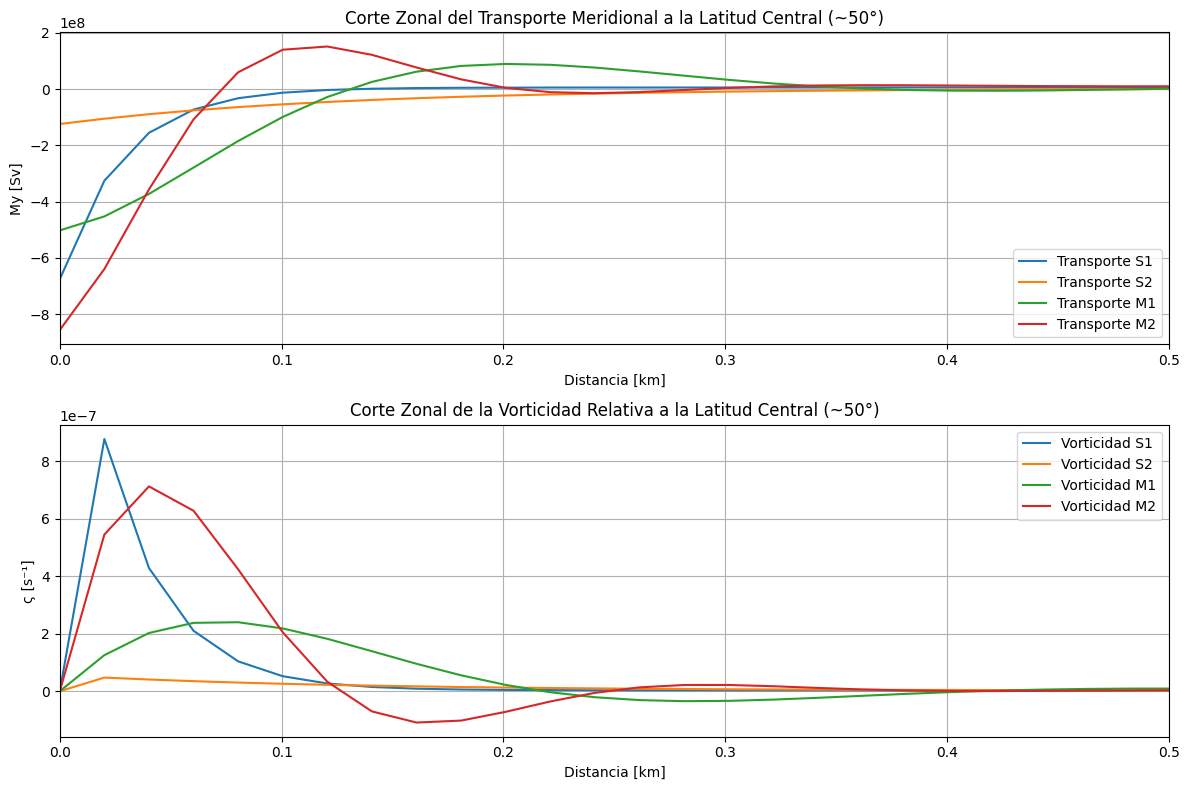

In [12]:
# Escoger la latitud central
lat_central_idx = Y.shape[0] // 2  # Índice de la latitud central

# Crear una figura para los gráficos
plt.figure(figsize=(12, 8))

# Graficar el corte zonal del transporte meridional
plt.subplot(2, 1, 1)
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Dimensionalización de las variables ya calculadas
    psi_dim = psiF * U * L
    trans_mer_dim = np.diff(psi_dim, n=1, axis=1) * D  # Calcular el transporte meridional dimensional

    # Extraer el corte zonal en la latitud central
    corte_zonal_trans_mer = trans_mer_dim[lat_central_idx, :]
    
    # Graficar
    plt.plot(X[:-1] / 1000, corte_zonal_trans_mer, label=f'Transporte {nombre}')

plt.title(f'Corte Zonal del Transporte Meridional a la Latitud Central (~{lat_central_idx}°)')
plt.xlim([0, 0.5])
plt.xlabel('Distancia [km]')
plt.ylabel('My [Sv]')
plt.legend()
plt.grid(True)

# Graficar el corte zonal de la vorticidad relativa
plt.subplot(2, 1, 2)
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    vortF = datos_modelo[3]  # Vorticidad en el tiempo final
    X, Y = datos_modelo[6], datos_modelo[7]  # Coordenadas X y Y

    # Dimensionalizar la vorticidad relativa
    vort_dim = vortF * U / L

    # Extraer el corte zonal en la latitud central
    corte_zonal_vort = vort_dim[lat_central_idx, :]

    # Graficar
    plt.plot(X / 1000, corte_zonal_vort, label=f'Vorticidad {nombre}')
    

plt.title(f'Corte Zonal de la Vorticidad Relativa a la Latitud Central (~{lat_central_idx}°)')
plt.xlim([0, 0.5])
plt.xlabel('Distancia [km]')
plt.ylabel('ς [s⁻¹]')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## Ejercicio 4

In [13]:
def analizar_simulacion(dir_salida, U, L, D):
    # Cargar los datos de la simulación
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiF = datos_modelo[2]  # Función corriente en el tiempo final
    X = datos_modelo[6]  # Coordenadas X
    
    # Calcular los parámetros requeridos usando la función Calc_TrasMer_CBO_LatCent
    Limite_CBO_LatCent, TrasMer_CBO_LatCent, TrasMer_total_LatCent = Calc_TrasMer_CBO_LatCent(X, psiF, U, L, D)
    
    return Limite_CBO_LatCent, TrasMer_CBO_LatCent, TrasMer_total_LatCent

In [14]:
# Diccionario para almacenar los resultados de cada simulación
resultados = {}

# Realizar los cálculos para cada simulación
for nombre, dir_salida in dir_salidas.items():
    limite_CBO, trasMer_CBO, trasMer_total = analizar_simulacion(dir_salida, U, L, D)
    resultados[nombre] = {
        'Limite_CBO_LatCent': limite_CBO,
        'TrasMer_CBO_LatCent': trasMer_CBO,
        'TrasMer_total_LatCent': trasMer_total
    }

# Mostrar resultados
for nombre, valores in resultados.items():
    print(f"Resultados para {nombre}:")
    print(f"  Extensión zonal de la CBO a la latitud central: {valores['Limite_CBO_LatCent']:.2f} km")
    print(f"  Transporte meridional de la CBO a la latitud central: {valores['TrasMer_CBO_LatCent']:.2f} Sv")
    print(f"  Transporte meridional total a la latitud central: {valores['TrasMer_total_LatCent']} Sv\n")

Resultados para S1:
  Extensión zonal de la CBO a la latitud central: 140.70 km
  Transporte meridional de la CBO a la latitud central: -1276.25 Sv
  Transporte meridional total a la latitud central: -6.984919309616089e-13 Sv

Resultados para S2:
  Extensión zonal de la CBO a la latitud central: 502.51 km
  Transporte meridional de la CBO a la latitud central: -773.60 Sv
  Transporte meridional total a la latitud central: -1.3783574104309081e-13 Sv

Resultados para M1:
  Extensión zonal de la CBO a la latitud central: 140.70 km
  Transporte meridional de la CBO a la latitud central: -1893.15 Sv
  Transporte meridional total a la latitud central: 2.1234154701232911e-13 Sv

Resultados para M2:
  Extensión zonal de la CBO a la latitud central: 80.40 km
  Transporte meridional de la CBO a la latitud central: -1901.12 Sv
  Transporte meridional total a la latitud central: -9.313225746154786e-14 Sv



## Ejercicio 5

In [15]:
### Todo sacado de varios.py

modelos = ['S1', 'M1']
for modelo in modelos:
    dir_salida = dir_salidas[modelo]
    
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiadim = datos_modelo[2]
    vortadim = datos_modelo[3]
    QG_curlw = datos_modelo[5]

    # Dimensionalización de las variables
    psidim = psiadim * U * L
    vortdim = vortadim * U / L
    Ev1 = 0.005

    # Transporte meridional promediado en la vertical (derivada zonal de la función corriente multiplicada por la profundidad)
    trans_mer = np.diff(psiadim, n=1, axis=1) * D

    # Términos ecuación de Stommel
    ds = 0.1
    ter1 = np.diff(psiadim, n=1, axis=1)
    ter1_LatCent = np.squeeze(ter1[int(np.size(ter1, 0) / 2), :]) / ds

    ter2 = -QG_curlw[int(np.size(ter1, 0) / 2), 1:(nx + 1)]
    ter3 = Ef * vortadim[int(np.size(ter1, 0) / 2), :]

    # Términos ecuación Munk
    term1 = np.diff(psiadim, n=1, axis=1)[int(np.size(psiadim, 0) / 2), :] / ds
    term2 = -QG_curlw[int(np.size(QG_curlw, 0) / 2), 1:-1]
    term3 = -Ev1 * Calc_del2(vortadim, ds)[int(np.size(vortadim, 0) / 2), :]

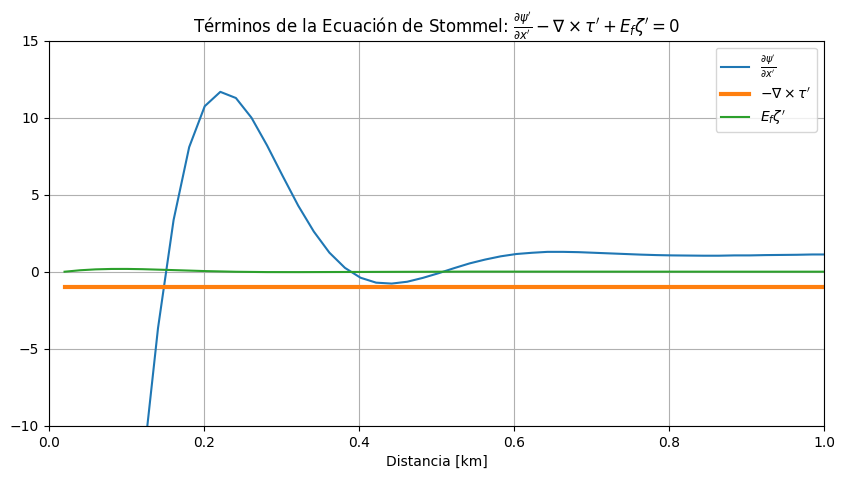

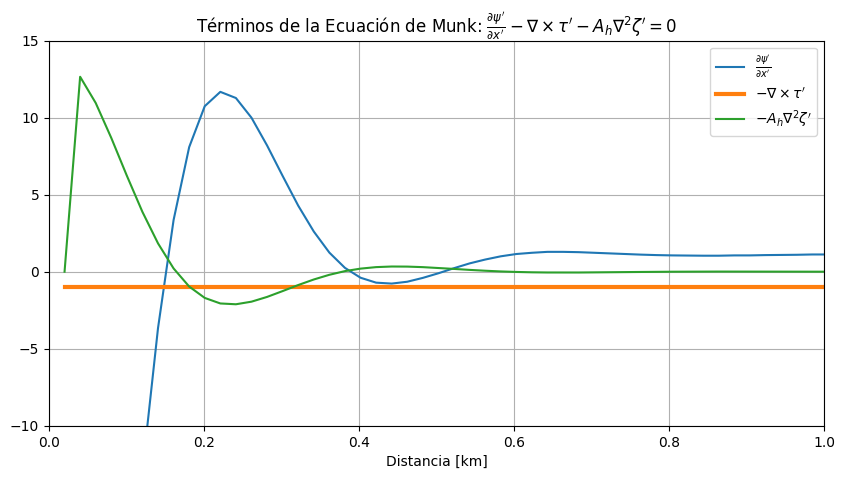

In [16]:
# Variables correspondientes al modelo S1 (Stommel 1)
X_S1_final = datos_modelo[6][1:-1]  # Ajustar para que coincida con los términos derivados
min_length_s1 = min(len(X_S1_final), len(ter1_LatCent), len(ter2), len(ter3))
X_S1_final = X_S1_final[:min_length_s1]
ter1_LatCent = ter1_LatCent[:min_length_s1]
ter2 = ter2[:min_length_s1]
ter3 = ter3[:min_length_s1]

# Graficar los términos para la ecuación de Stommel en S1
plt.figure(figsize=(10, 5))
plt.plot(X_S1_final / 1000, ter1_LatCent, label=r"$\frac{\partial \psi'}{\partial x'}$")
plt.plot(X_S1_final / 1000, ter2, label=r"$-\nabla \times \tau'$", linewidth=3)
plt.plot(X_S1_final / 1000, ter3, label=r"$E_f \zeta'$")
plt.legend()
plt.title(r"Términos de la Ecuación de Stommel: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' + E_f \zeta' = 0$")
plt.grid()
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.ylim([-10, 15])
plt.show()

# Variables correspondientes al modelo M1 (Munk 1)
X_M1_final = datos_modelo[6][1:-1]  # Ajustar para que coincida con los términos derivados
min_length_m1 = min(len(X_M1_final), len(term1), len(term2), len(term3))
X_M1_final = X_M1_final[:min_length_m1]
term1 = term1[:min_length_m1]
term2 = term2[:min_length_m1]
term3 = term3[:min_length_m1]

# Graficar los términos para la ecuación de Munk en M1
plt.figure(figsize=(10, 5))
plt.plot(X_M1_final / 1000, term1, label=r"$\frac{\partial \psi'}{\partial x'}$")
plt.plot(X_M1_final / 1000, term2, label=r"$-\nabla \times \tau'$", linewidth=3)
plt.plot(X_M1_final / 1000, term3, label=r"$-A_h \nabla^2 \zeta'$")
plt.legend()
plt.title(r"Términos de la Ecuación de Munk: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' - A_h \nabla^2 \zeta' = 0}$")
plt.grid()
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.ylim([-10, 15])
plt.show()


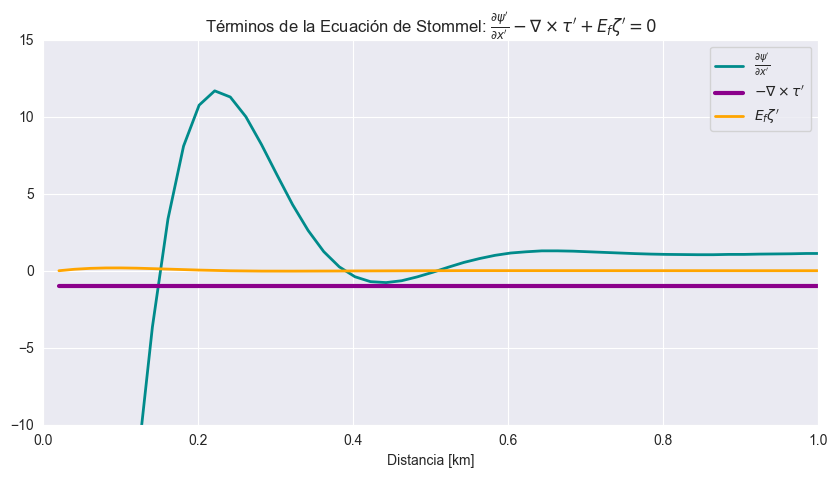

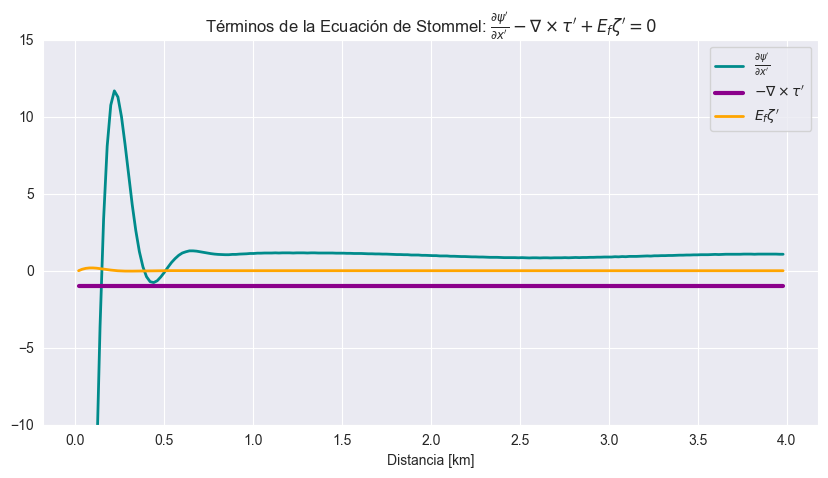

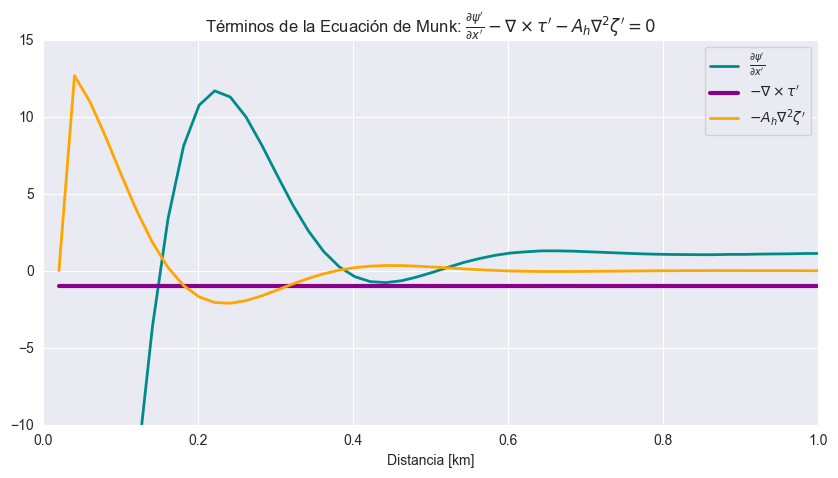

In [17]:
import seaborn as sns
# Applying the aesthetic used in the provided example
sns.set_style("darkgrid")

# Graficar los términos para la ecuación de Stommel en S1
plt.figure(figsize=(10, 5))
plt.plot(X_S1_final / 1000, ter1_LatCent, label=r"$\frac{\partial \psi'}{\partial x'}$", color='darkcyan', linewidth=2)
plt.plot(X_S1_final / 1000, ter2, label=r"$-\nabla \times \tau'$", color='darkmagenta', linewidth=3)
plt.plot(X_S1_final / 1000, ter3, label=r"$E_f \zeta'$", color='orange', linewidth=2)
plt.legend()
plt.title(r"Términos de la Ecuación de Stommel: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' + E_f \zeta' = 0$")
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.ylim([-10, 15])
plt.grid(True)
plt.show()

# Replotting without the xlim for comparison
plt.figure(figsize=(10, 5))
plt.plot(X_S1_final / 1000, ter1_LatCent, label=r"$\frac{\partial \psi'}{\partial x'}$", color='darkcyan', linewidth=2)
plt.plot(X_S1_final / 1000, ter2, label=r"$-\nabla \times \tau'$", color='darkmagenta', linewidth=3)
plt.plot(X_S1_final / 1000, ter3, label=r"$E_f \zeta'$", color='orange', linewidth=2)
plt.legend()
plt.title(r"Términos de la Ecuación de Stommel: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' + E_f \zeta' = 0$")
plt.xlabel("Distancia [km]")
plt.ylim([-10, 15])
plt.grid(True)
plt.show()

# Graficar los términos para la ecuación de Munk en M1 usando la misma estética 'darkgrid'
plt.figure(figsize=(10, 5))
plt.plot(X_M1_final / 1000, term1, label=r"$\frac{\partial \psi'}{\partial x'}$", color='darkcyan', linewidth=2)
plt.plot(X_M1_final / 1000, term2, label=r"$-\nabla \times \tau'$", color='darkmagenta', linewidth=3)
plt.plot(X_M1_final / 1000, term3, label=r"$-A_h \nabla^2 \zeta'$", color='orange', linewidth=2)
plt.legend()
plt.title(r"Términos de la Ecuación de Munk: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' - A_h \nabla^2 \zeta' = 0$")
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.ylim([-10, 15])
plt.grid(True)
plt.show()

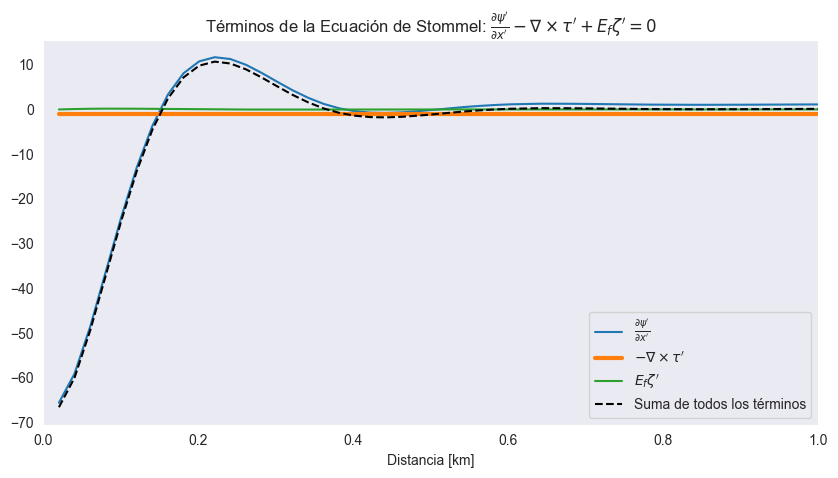

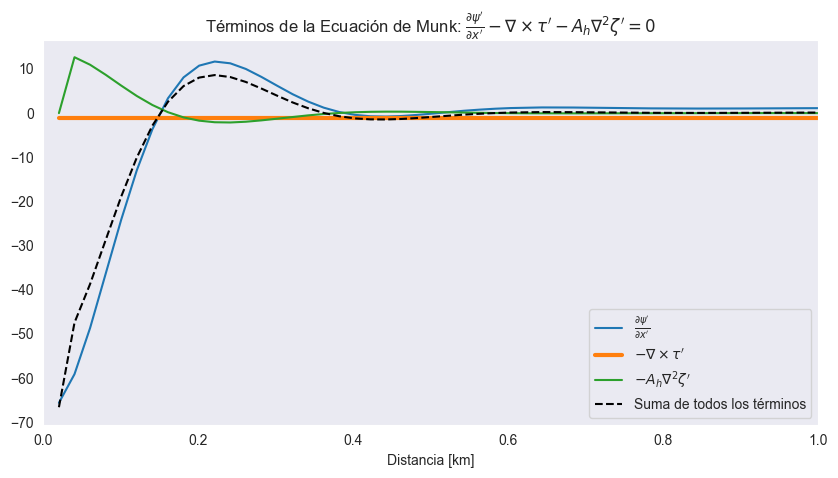

In [18]:
# Variables correspondientes al modelo S1 (Stommel 1)
X_S1_final = datos_modelo[6][1:-1]  # Ajustar para que coincida con los términos derivados
min_length_s1 = min(len(X_S1_final), len(ter1_LatCent), len(ter2), len(ter3))
X_S1_final = X_S1_final[:min_length_s1]
ter1_LatCent = ter1_LatCent[:min_length_s1]
ter2 = ter2[:min_length_s1]
ter3 = ter3[:min_length_s1]

# Calcular la suma de todos los términos para S1
suma_terminos_S1 = ter1_LatCent + ter2 + ter3

# Graficar los términos para la ecuación de Stommel en S1
plt.figure(figsize=(10, 5))
plt.plot(X_S1_final / 1000, ter1_LatCent, label=r"$\frac{\partial \psi'}{\partial x'}$")
plt.plot(X_S1_final / 1000, ter2, label=r"$-\nabla \times \tau'$", linewidth=3)
plt.plot(X_S1_final / 1000, ter3, label=r"$E_f \zeta'$")
plt.plot(X_S1_final / 1000, suma_terminos_S1, label="Suma de todos los términos", linestyle='--', color='black')
plt.legend()
plt.title(r"Términos de la Ecuación de Stommel: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' + E_f \zeta' = 0$")
plt.grid()
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.show()

# Variables correspondientes al modelo M1 (Munk 1)
X_M1_final = datos_modelo[6][1:-1]  # Ajustar para que coincida con los términos derivados
min_length_m1 = min(len(X_M1_final), len(term1), len(term2), len(term3))
X_M1_final = X_M1_final[:min_length_m1]
term1 = term1[:min_length_m1]
term2 = term2[:min_length_m1]
term3 = term3[:min_length_m1]

# Calcular la suma de todos los términos para M1
suma_terminos_M1 = term1 + term2 + term3

# Graficar los términos para la ecuación de Munk en M1
plt.figure(figsize=(10, 5))
plt.plot(X_M1_final / 1000, term1, label=r"$\frac{\partial \psi'}{\partial x'}$")
plt.plot(X_M1_final / 1000, term2, label=r"$-\nabla \times \tau'$", linewidth=3)
plt.plot(X_M1_final / 1000, term3, label=r"$-A_h \nabla^2 \zeta'$")
plt.plot(X_M1_final / 1000, suma_terminos_M1, label="Suma de todos los términos", linestyle='--', color='black')
plt.legend()
plt.title(r"Términos de la Ecuación de Munk: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' - A_h \nabla^2 \zeta' = 0$")
plt.grid()
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.show()


## Ejercicio 6

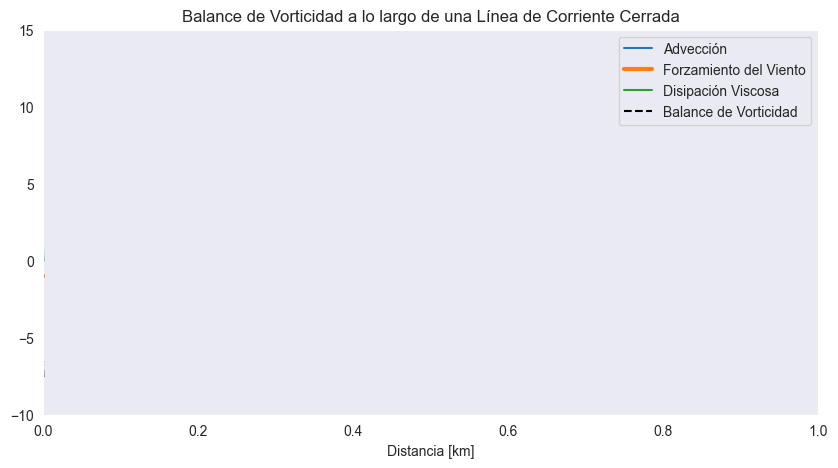

In [19]:
# Seleccionar la línea de corriente en el centro de la cuenca
lat_central = int(np.size(psiadim, 0) / 2)

# Extraer la línea de corriente y ajustar la longitud
linea_corriente = psiadim[lat_central, :-1]  # Ajustar para que coincida con los términos derivados

# Calcular los términos
adveccion = np.diff(psiadim, n=1, axis=1)[lat_central, :]
forzamiento_viento = -QG_curlw[lat_central, 1:-1]
disipacion_viscosa = -Ev1 * Calc_del2(vortadim, ds)[lat_central, :]

# Ajustar longitudes para asegurar que todas coincidan
min_length = min(len(linea_corriente), len(adveccion), len(forzamiento_viento), len(disipacion_viscosa))
linea_corriente = linea_corriente[:min_length]
adveccion = adveccion[:min_length]
forzamiento_viento = forzamiento_viento[:min_length]
disipacion_viscosa = disipacion_viscosa[:min_length]

# Sumar todos los términos de la ecuación de vorticidad
balance_vorticidad = adveccion + forzamiento_viento + disipacion_viscosa

# Graficar el balance de vorticidad
plt.figure(figsize=(10, 5))
plt.plot(linea_corriente / 1000, adveccion, label="Advección")
plt.plot(linea_corriente / 1000, forzamiento_viento, label="Forzamiento del Viento", linewidth=3)
plt.plot(linea_corriente / 1000, disipacion_viscosa, label="Disipación Viscosa")
plt.plot(linea_corriente / 1000, balance_vorticidad, label="Balance de Vorticidad", linestyle='--', color='black')
plt.legend()
plt.title("Balance de Vorticidad a lo largo de una Línea de Corriente Cerrada")
plt.grid()
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.ylim([-10, 15])
plt.show()

In [20]:
cosas = [adveccion, forzamiento_viento, disipacion_viscosa]
for i in cosas:
    print(len(i))

199
199
199


In [21]:
print(adveccion)
print(forzamiento_viento)
print(disipacion_viscosa)
print(balance_vorticidad)

[-6.558 -5.909 -4.865 -3.642 -2.41  -1.293 -0.366  0.336  0.809  1.075
  1.168  1.128  1.     0.82   0.622  0.429  0.261  0.124  0.025 -0.039
 -0.071 -0.077 -0.065 -0.04  -0.01   0.023  0.054  0.079  0.1    0.115
  0.123  0.129  0.129  0.127  0.123  0.119  0.115  0.111  0.108  0.106
  0.105  0.104  0.104  0.106  0.106  0.108  0.109  0.11   0.112  0.112
  0.114  0.114  0.115  0.115  0.115  0.116  0.115  0.116  0.116  0.116
  0.115  0.116  0.116  0.116  0.115  0.116  0.116  0.115  0.115  0.115
  0.115  0.115  0.114  0.114  0.114  0.113  0.113  0.112  0.112  0.112
  0.111  0.11   0.11   0.109  0.109  0.108  0.108  0.107  0.106  0.105
  0.105  0.104  0.104  0.102  0.102  0.102  0.1    0.1    0.099  0.098
  0.098  0.096  0.096  0.096  0.094  0.094  0.093  0.092  0.092  0.091
  0.09   0.09   0.089  0.089  0.088  0.087  0.087  0.087  0.086  0.085
  0.085  0.085  0.085  0.084  0.085  0.084  0.083  0.084  0.084  0.083
  0.084  0.084  0.083  0.084  0.084  0.084  0.085  0.084  0.085  0.086
  0.08

C:\Users\Portables\AppData\Local\Temp\ipykernel_11968\2940046411.py:28: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  plt.tight_layout()
C:\Users\Portables\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


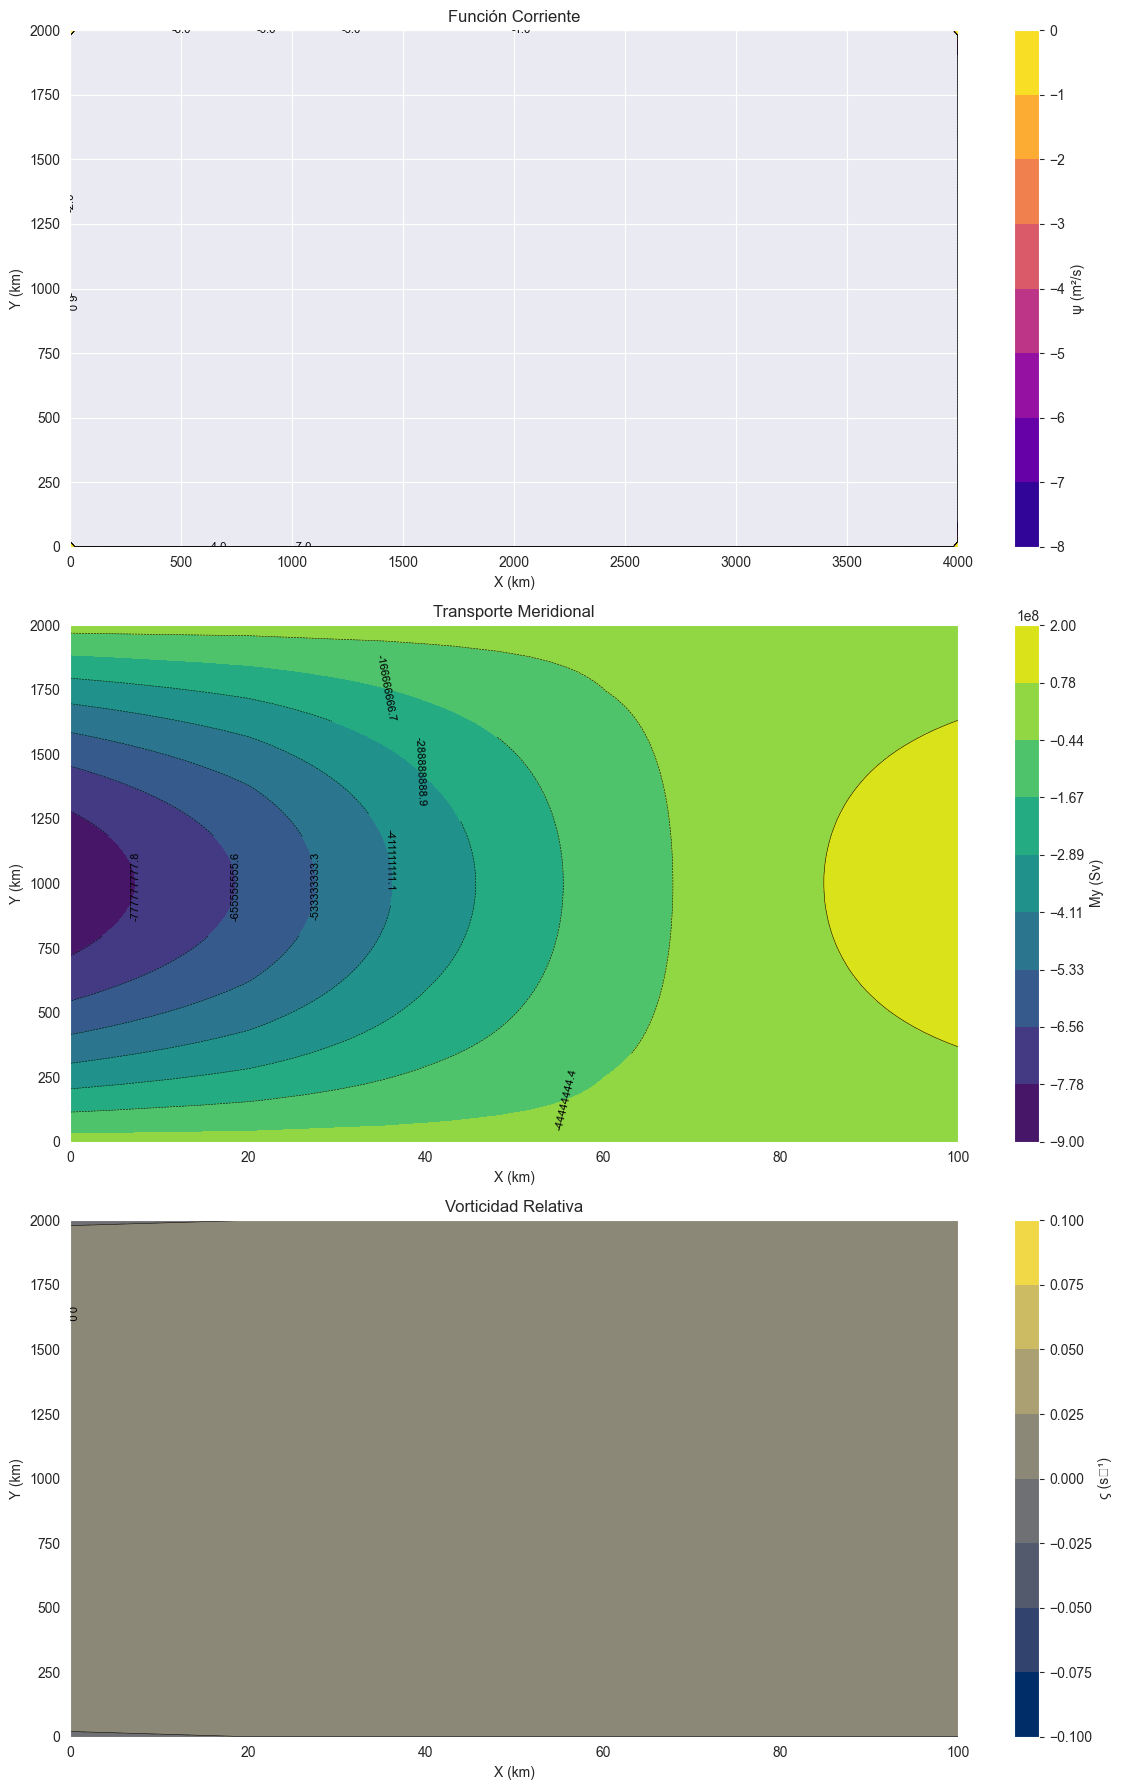

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los límites redondeados
psi_min, psi_max = -8.0, 0.0  # Para Función Corriente (ψ)
trans_mer_min, trans_mer_max = -9.0e8, 2.0e8  # Para Transporte Meridional (My)
vort_min, vort_max = -0.1, 0.1  # Para Vorticidad Relativa (ς)

# Crear los niveles con pasos uniformes y redondeados
psi_levels = np.linspace(psi_min, psi_max, 9)  # 9 niveles de -8.0 a 0.0
trans_mer_levels = np.linspace(trans_mer_min, trans_mer_max, 10)  # 10 niveles de -9.0e8 a 2.0e8
vort_levels = np.linspace(vort_min, vort_max, 9)  # 9 niveles de -0.1 a 0.1

# Generar gráficos con estos nuevos límites y niveles
fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # Tres subplots en una columna

# Función corriente (ψ)
plot_campos(X, Y, psi_dim, 'Función Corriente', 'X (km)', 'Y (km)', 'ψ (m²/s)', ax=axs[0], vmin=psi_min, vmax=psi_max, colormap='plasma', levels=psi_levels)

# Transporte meridional (My)
plot_campos(X[:-1], Y, trans_mer_dim, 'Transporte Meridional', 'X (km)', 'Y (km)', 'My (Sv)', ax=axs[1], vmin=trans_mer_min, vmax=trans_mer_max, colormap='viridis', levels=trans_mer_levels)
axs[1].set_xlim([0, x_lim_zoom])

# Vorticidad relativa (ς)
plot_campos(X, Y, vort_dim, 'Vorticidad Relativa', 'X (km)', 'Y (km)', 'ς (s⁻¹)', ax=axs[2], vmin=vort_min, vmax=vort_max, colormap='cividis', levels=vort_levels)
axs[2].set_xlim([0, x_lim_zoom])

plt.tight_layout()
plt.show()